In [1]:
import os
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', 300)
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('seaborn')
import sys
sys.path.append(os.path.abspath('../'))

import warnings
warnings.filterwarnings("ignore")

from server2022.src.train_val import *
from server2022.src.model_features import *
from server2022.data.processed.prepare_data import *


OUTPUT_FILE = '../reports/1_year_30_days_random_seed.csv'
# RANDOM_STATE = 420

TARGET_DICT = {'1': 'binary_target', '2': 'target_more30days', '3': 'target_more90days'}
'''Choose target: 
    1 - binary_target
    2 - target_more30days
    3 - target_more90days
'''
TARGET_COL = TARGET_DICT['2'] # TARGET_DICT[input()]

In [2]:
# for 30_days {'depth': 4.0, 'l2_leaf_reg': 8.836237522928192, 'learning_rate': 0.019172380484543887}

model = CatBoostClassifier(iterations=1500,
                               depth=4, 
                               l2_leaf_reg=8.8, 
                               learning_rate=0.0192, # 0.01433
                               loss_function='Logloss',
                               use_best_model=False,
                               eval_metric='AUC',
                               verbose=False,
                               class_weights=[1, 0.1], #0.0006
                               random_seed=RANDOM_STATE,
                              )

## No features

In [23]:
df = create_df_1year_known(add_growth=False, count_log_fin_vals=False, normalize_fin_columns=False, drop_zeros=False)

In [24]:
feat_gen = Feature_gen(-2, -1)
df = feat_gen.preprocessing_before_fitting(df, use_diff_features=False, use_ratio_features=False)

Target = target_more30days
Fitting model <catboost.core.CatBoostClassifier object at 0x000002545DE3A460> with threshold = 0.5...
Fitting model <catboost.core.CatBoostClassifier object at 0x000002545DE3A460> with threshold = 0.5...
Fitting model <catboost.core.CatBoostClassifier object at 0x000002545DE3A460> with threshold = 0.5...
Fitting model <catboost.core.CatBoostClassifier object at 0x000002545DE3A460> with threshold = 0.5...
Fitting model <catboost.core.CatBoostClassifier object at 0x000002545DE3A460> with threshold = 0.5...
Fitting model <catboost.core.CatBoostClassifier object at 0x000002545DE3A460> with threshold = 0.01564...
Fitting model <catboost.core.CatBoostClassifier object at 0x000002545DE3A460> with threshold = 0.01564...


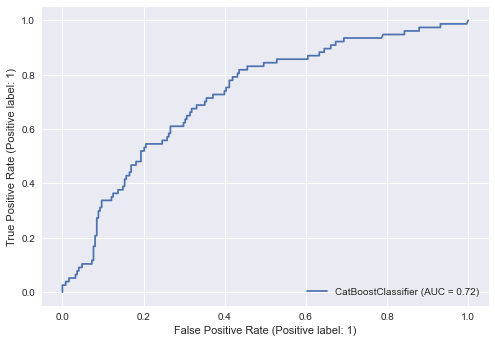


TRAIN: F1 = 0.411, Precision = 0.3, Recall = 0.651, Accuracy = 0.708, ROC_AUC = 0.753
TEST: F1 = 0.495, Precision = 0.391, Recall = 0.675, Accuracy = 0.674, ROC_AUC = 0.723



In [27]:
make_report_with_best_threshold(model, df, to_file=False, target_col=TARGET_COL, num_random_states=5,
                                file_path=OUTPUT_FILE, comment='no_features')

## drop_zeros=True

In [19]:
df = create_df_1year_known(add_growth=False, count_log_fin_vals=False, normalize_fin_columns=False, drop_zeros=True)

In [20]:
feat_gen = Feature_gen(-2, -1)
df = feat_gen.preprocessing_before_fitting(df, use_diff_features=False, use_ratio_features=False)

Target = target_more30days
Fitting model <catboost.core.CatBoostClassifier object at 0x0000025368DA3130> with threshold = 0.01457...


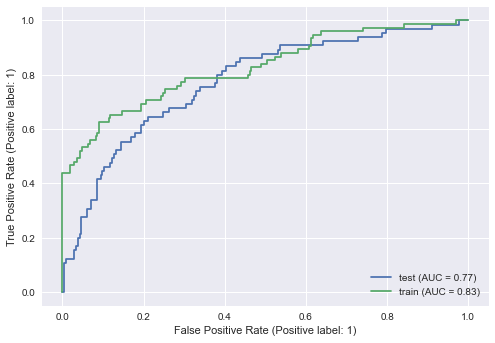

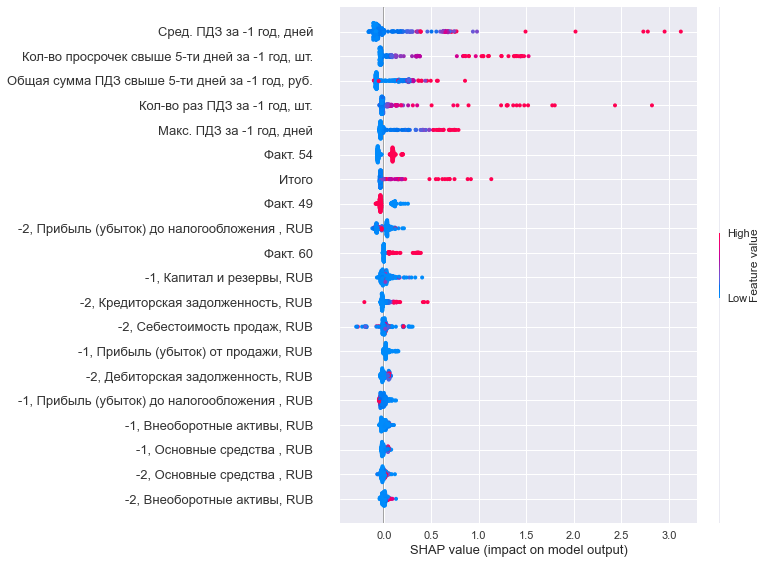


TRAIN: F1 = 0.463, Precision = 0.335, Recall = 0.747, Accuracy = 0.722, ROC_AUC = 0.826
TEST: F1 = 0.517, Precision = 0.382, Recall = 0.8, Accuracy = 0.651, ROC_AUC = 0.774



In [21]:
make_report_with_best_threshold(model, df, to_file=True, target_col=TARGET_COL, num_random_states=5,
                                file_path=OUTPUT_FILE, comment='drop_zeros=True')

## use_diff_features=True

In [22]:
df = create_df_1year_known(add_growth=False, count_log_fin_vals=False, normalize_fin_columns=False, drop_zeros=False)

In [23]:
feat_gen = Feature_gen(-2, -1)
df = feat_gen.preprocessing_before_fitting(df, use_diff_features=True, use_ratio_features=False)

Target = target_more30days
Fitting model <catboost.core.CatBoostClassifier object at 0x0000025368DA3130> with threshold = 0.01396...


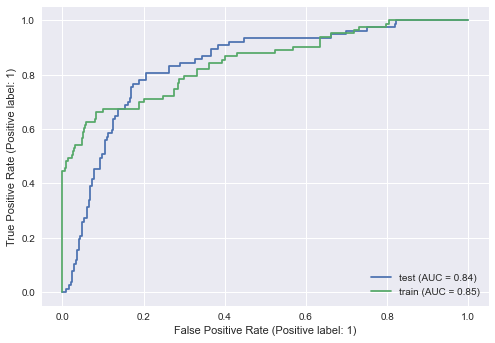

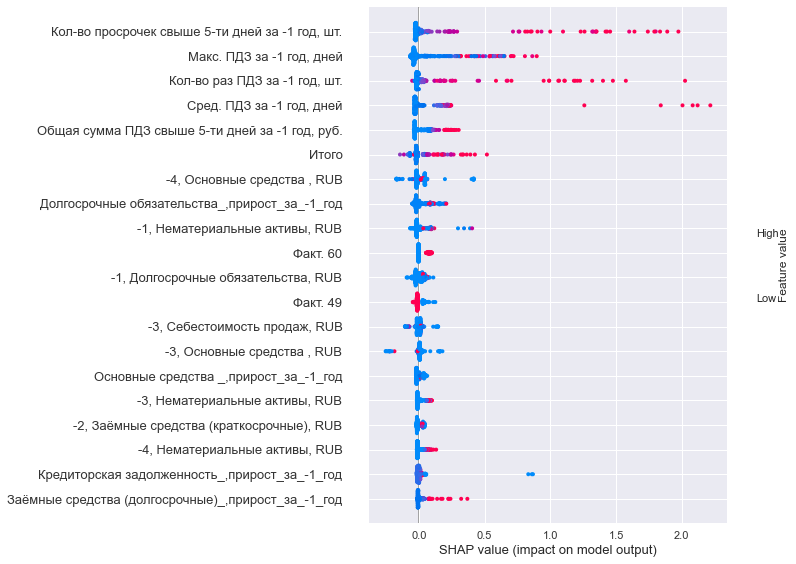


TRAIN: F1 = 0.465, Precision = 0.333, Recall = 0.771, Accuracy = 0.723, ROC_AUC = 0.847
TEST: F1 = 0.582, Precision = 0.431, Recall = 0.896, Accuracy = 0.695, ROC_AUC = 0.837



In [24]:
make_report_with_best_threshold(model, df, to_file=True, target_col=TARGET_COL, num_random_states=5,
                                file_path=OUTPUT_FILE, comment='use_diff_features=True')

## use_ratio_features=True

In [25]:
df = create_df_1year_known(add_growth=False, count_log_fin_vals=False, normalize_fin_columns=False, drop_zeros=False)

In [26]:
feat_gen = Feature_gen(-2, -1)
df = feat_gen.preprocessing_before_fitting(df, use_diff_features=False, use_ratio_features=True)

Target = target_more30days
Fitting model <catboost.core.CatBoostClassifier object at 0x0000025368DA3130> with threshold = 0.01374...


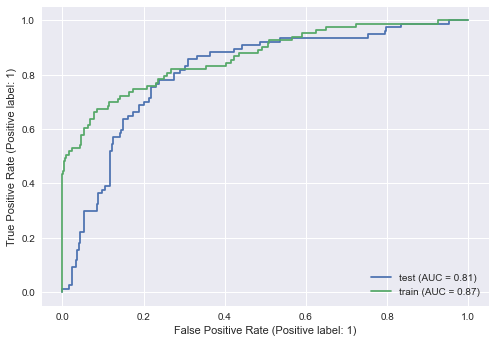

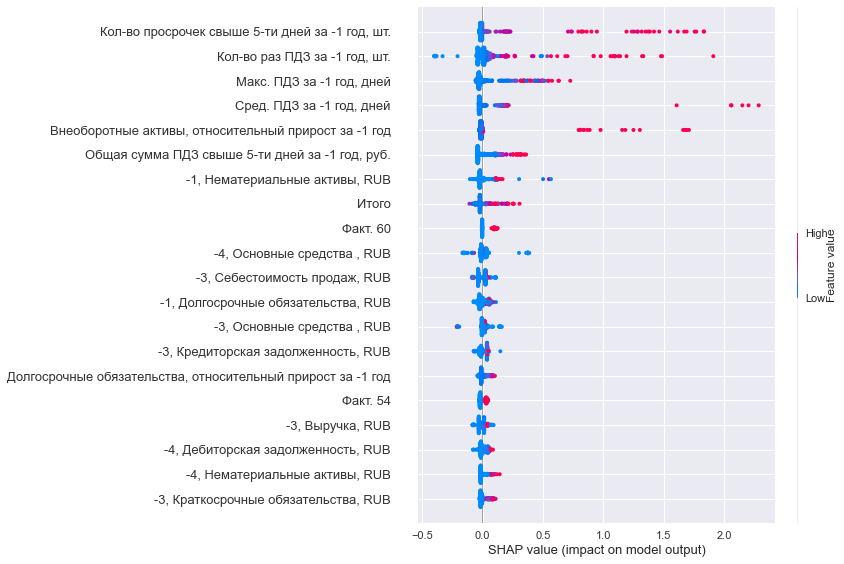


TRAIN: F1 = 0.466, Precision = 0.325, Recall = 0.819, Accuracy = 0.706, ROC_AUC = 0.865
TEST: F1 = 0.546, Precision = 0.395, Recall = 0.883, Accuracy = 0.652, ROC_AUC = 0.81



In [27]:
make_report_with_best_threshold(model, df, to_file=True, target_col=TARGET_COL, num_random_states=5,
                                file_path=OUTPUT_FILE, comment='use_ratio_features=True')

## add_growth=True

In [51]:
df = create_df_1year_known(add_growth=True, count_log_fin_vals=False, normalize_fin_columns=False, drop_zeros=False)

In [52]:
feat_gen = Feature_gen(-2, -1)
df = feat_gen.preprocessing_before_fitting(df, use_diff_features=False, use_ratio_features=False)

Target = target_more30days
Fitting model <catboost.core.CatBoostClassifier object at 0x0000025368DAD370> with threshold = 0.01458...


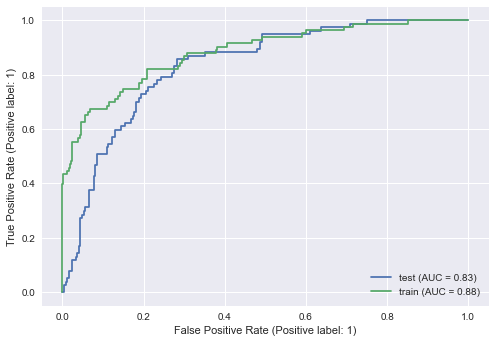

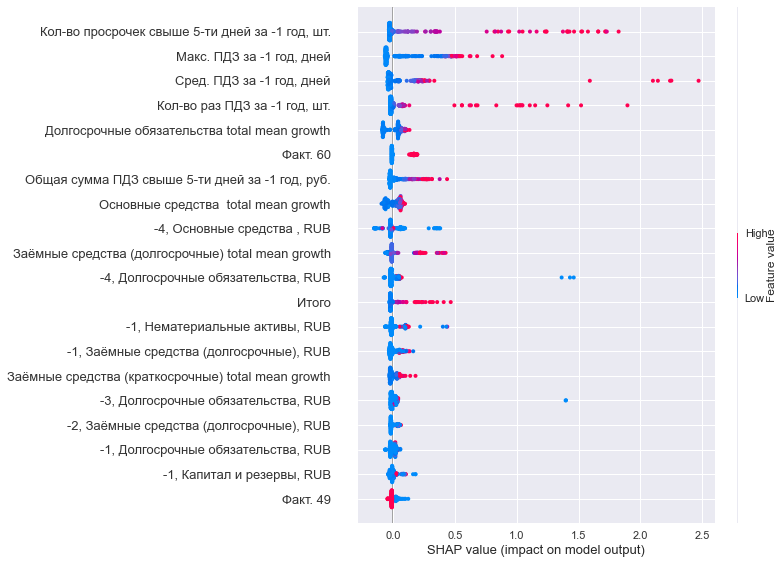


TRAIN: F1 = 0.5, Precision = 0.36, Recall = 0.819, Accuracy = 0.744, ROC_AUC = 0.882
TEST: F1 = 0.576, Precision = 0.428, Recall = 0.883, Accuracy = 0.692, ROC_AUC = 0.834



In [53]:
make_report_with_best_threshold(model, df, to_file=True, target_col=TARGET_COL, num_random_states=5,
                                file_path=OUTPUT_FILE, comment='add_growth=True')

## count_log_fin_vals=True

In [31]:
df = create_df_1year_known(add_growth=False, count_log_fin_vals=True, normalize_fin_columns=False, drop_zeros=False)

In [32]:
feat_gen = Feature_gen(-2, -1)
df = feat_gen.preprocessing_before_fitting(df, use_diff_features=False, use_ratio_features=False)

Target = target_more30days
Fitting model <catboost.core.CatBoostClassifier object at 0x0000025368DA3130> with threshold = 0.014...


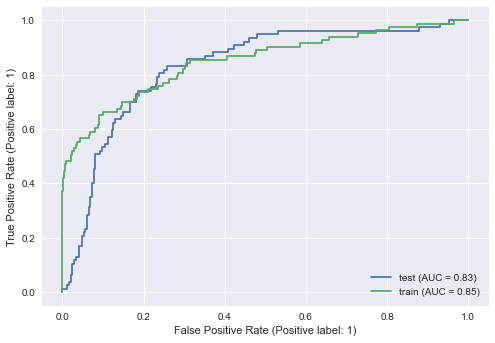

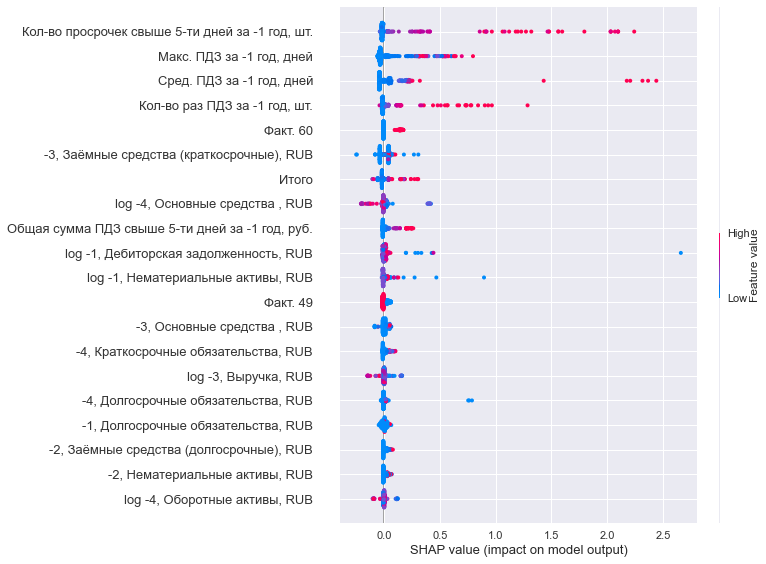


TRAIN: F1 = 0.482, Precision = 0.344, Recall = 0.807, Accuracy = 0.729, ROC_AUC = 0.849
TEST: F1 = 0.571, Precision = 0.422, Recall = 0.883, Accuracy = 0.686, ROC_AUC = 0.83



In [33]:
make_report_with_best_threshold(model, df, to_file=True, target_col=TARGET_COL, num_random_states=5,
                                file_path=OUTPUT_FILE, comment='count_log_fin_vals=True')

## normalize_fin_columns=True

In [34]:
df = create_df_1year_known(add_growth=False, count_log_fin_vals=False, normalize_fin_columns=True, drop_zeros=False)

In [35]:
feat_gen = Feature_gen(-2, -1)
df = feat_gen.preprocessing_before_fitting(df, use_diff_features=False, use_ratio_features=False)

Target = target_more30days
Fitting model <catboost.core.CatBoostClassifier object at 0x0000025368DA3130> with threshold = 0.01459...


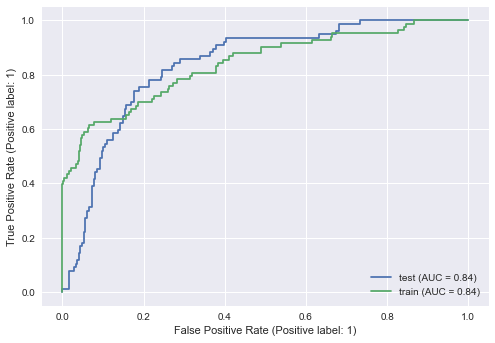

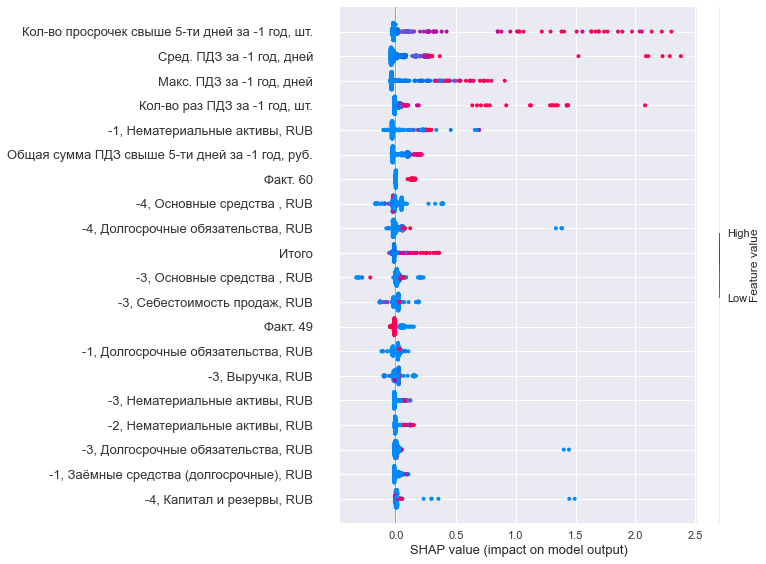


TRAIN: F1 = 0.472, Precision = 0.342, Recall = 0.759, Accuracy = 0.734, ROC_AUC = 0.84
TEST: F1 = 0.583, Precision = 0.438, Recall = 0.87, Accuracy = 0.705, ROC_AUC = 0.837



In [36]:
make_report_with_best_threshold(model, df, to_file=True, target_col=TARGET_COL, num_random_states=5,
                                file_path=OUTPUT_FILE, comment='normalize_fin_columns=True')

## add_growth=True + use_diff_features=True

In [37]:
df = create_df_1year_known(add_growth=True, count_log_fin_vals=False, normalize_fin_columns=False, drop_zeros=False)

In [38]:
feat_gen = Feature_gen(-2, -1)
df = feat_gen.preprocessing_before_fitting(df, use_diff_features=True, use_ratio_features=False)

Target = target_more30days
Fitting model <catboost.core.CatBoostClassifier object at 0x0000025368DA3130> with threshold = 0.01435...


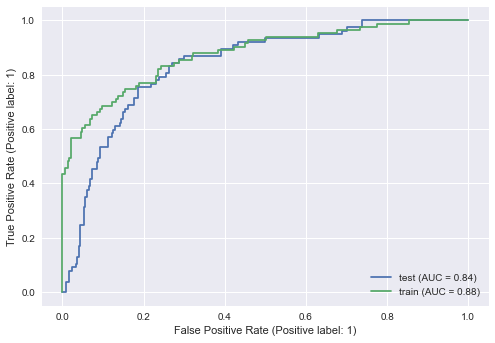

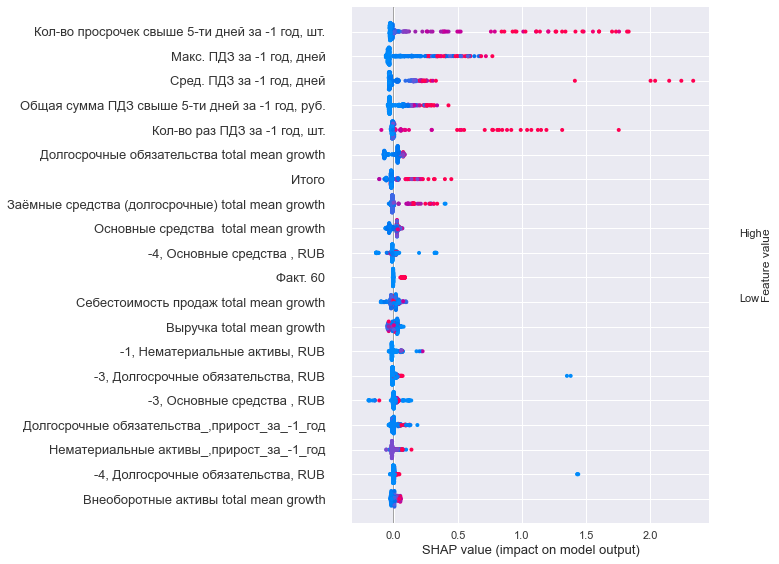


TRAIN: F1 = 0.509, Precision = 0.367, Recall = 0.831, Accuracy = 0.75, ROC_AUC = 0.877
TEST: F1 = 0.575, Precision = 0.429, Recall = 0.87, Accuracy = 0.695, ROC_AUC = 0.837



In [39]:
make_report_with_best_threshold(model, df, to_file=True, target_col=TARGET_COL, num_random_states=5,
                                file_path=OUTPUT_FILE, comment='add_growth=True + use_diff_features=True')

## add_growth=True + use_diff_features=True + normalize_fin_columns=True

In [40]:
df = create_df_1year_known(add_growth=True, count_log_fin_vals=False, normalize_fin_columns=True, drop_zeros=False)

In [41]:
feat_gen = Feature_gen(-2, -1)
df = feat_gen.preprocessing_before_fitting(df, use_diff_features=True, use_ratio_features=False)

Target = target_more30days
Fitting model <catboost.core.CatBoostClassifier object at 0x0000025368DA3130> with threshold = 0.01382...


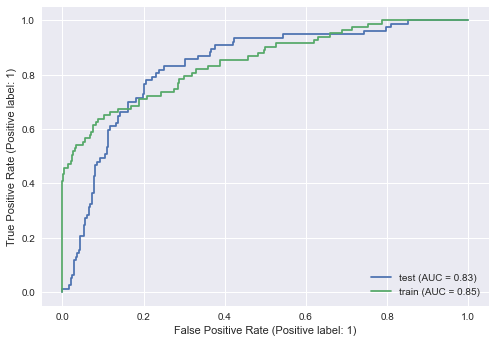

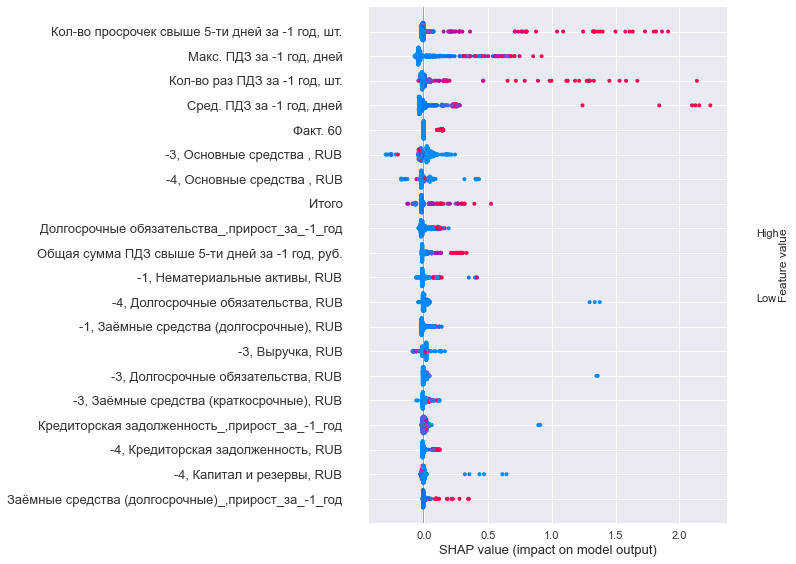


TRAIN: F1 = 0.462, Precision = 0.325, Recall = 0.795, Accuracy = 0.71, ROC_AUC = 0.848
TEST: F1 = 0.576, Precision = 0.428, Recall = 0.883, Accuracy = 0.692, ROC_AUC = 0.833



In [42]:
make_report_with_best_threshold(model, df, to_file=True, target_col=TARGET_COL, num_random_states=5,
                                file_path=OUTPUT_FILE, comment='add_growth=True + use_diff_features=True + normalize_fin_columns=True')

## add_growth=True + use_diff_features=True + normalize_fin_columns=True + count_log_fin_vals=True

In [43]:
df = create_df_1year_known(add_growth=True, count_log_fin_vals=True, normalize_fin_columns=True, drop_zeros=False)

In [44]:
feat_gen = Feature_gen(-2, -1)
df = feat_gen.preprocessing_before_fitting(df, use_diff_features=True, use_ratio_features=False)

Target = target_more30days
Fitting model <catboost.core.CatBoostClassifier object at 0x0000025368DA3130> with threshold = 0.01348...


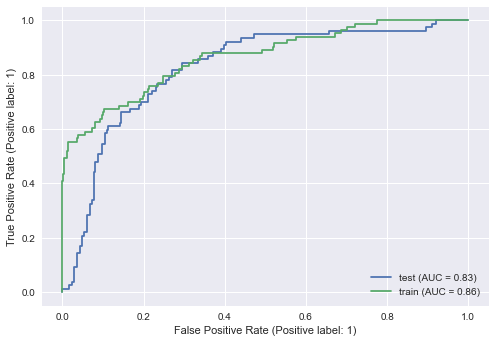

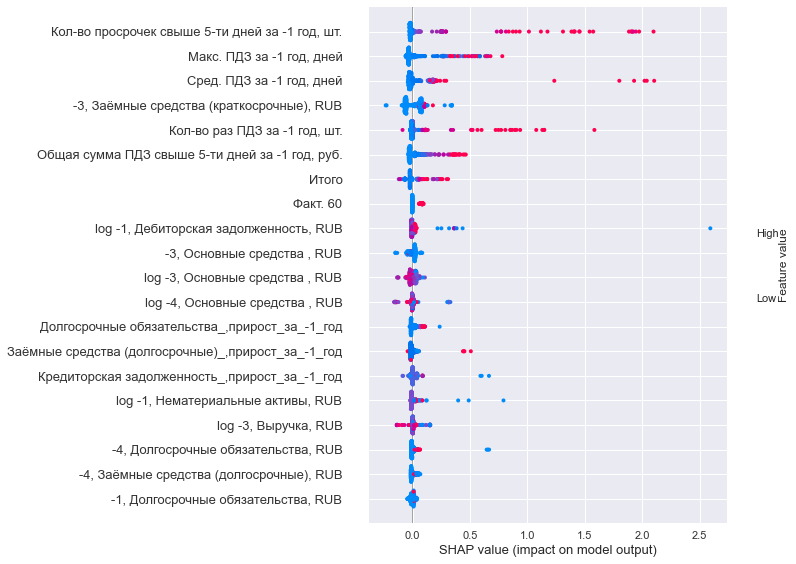


TRAIN: F1 = 0.481, Precision = 0.34, Recall = 0.819, Accuracy = 0.723, ROC_AUC = 0.864
TEST: F1 = 0.571, Precision = 0.422, Recall = 0.883, Accuracy = 0.686, ROC_AUC = 0.825



In [45]:
make_report_with_best_threshold(model, df, to_file=True, target_col=TARGET_COL, num_random_states=5,
                                file_path=OUTPUT_FILE, comment='add_growth=True + use_diff_features=True + normalize_fin_columns=True + count_log_fin_vals=True')

## add_growth=True + use_diff_features=True + normalize_fin_columns=True + count_log_fin_vals=True + use_ratio_features=True

In [54]:
df = create_df_1year_known(add_growth=True, count_log_fin_vals=True, normalize_fin_columns=True, drop_zeros=False)

In [55]:
feat_gen = Feature_gen(-2, -1)
df = feat_gen.preprocessing_before_fitting(df, use_diff_features=True, use_ratio_features=True)

Target = target_more30days
Fitting model <catboost.core.CatBoostClassifier object at 0x0000025368DAD370> with threshold = 0.01381...


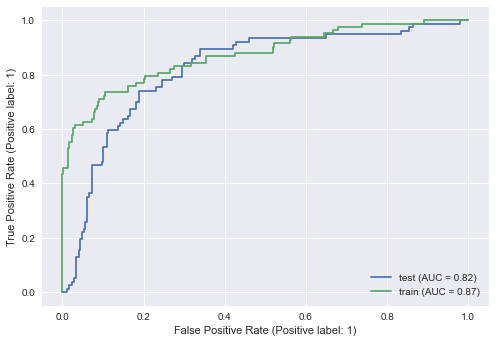

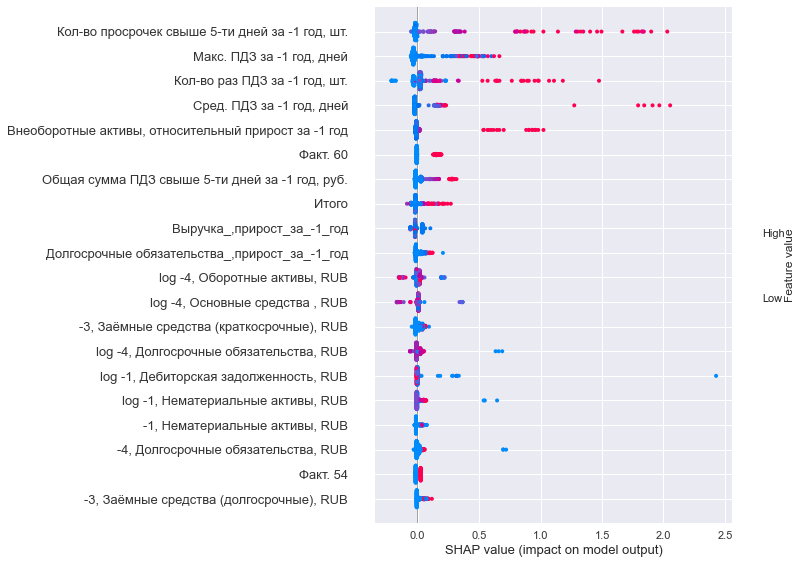


TRAIN: F1 = 0.489, Precision = 0.347, Recall = 0.831, Accuracy = 0.729, ROC_AUC = 0.873
TEST: F1 = 0.556, Precision = 0.4, Recall = 0.909, Accuracy = 0.655, ROC_AUC = 0.822



In [56]:
make_report_with_best_threshold(model, df, to_file=True, target_col=TARGET_COL, num_random_states=5,
                                file_path=OUTPUT_FILE, comment='add_growth=True + use_diff_features=True + normalize_fin_columns=True + count_log_fin_vals=True + use_ratio_features=True')

## All features

In [2]:
df = create_df_1year_known()

In [3]:
feat_gen = Feature_gen(-2, -1)
df = feat_gen.preprocessing_before_fitting(df)

Target = binary_target
Fitting model <catboost.core.CatBoostClassifier object at 0x000001AE1AB1C430> with threshold = 0.20448...


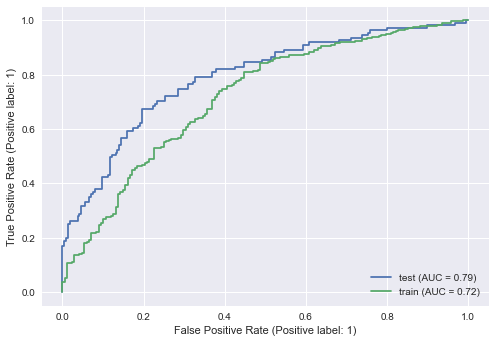

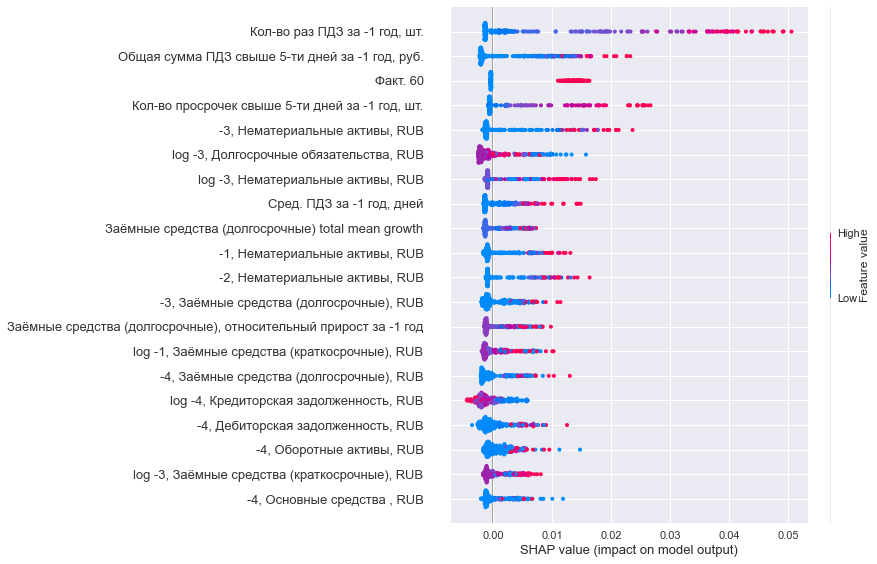


TRAIN: F1 = 0.547, Precision = 0.845, Recall = 0.405, Accuracy = 0.542, ROC_AUC = 0.718
TEST: F1 = 0.646, Precision = 0.559, Recall = 0.766, Accuracy = 0.714, ROC_AUC = 0.79



In [6]:
make_report_with_best_threshold(model, df, to_file=True, target_col=TARGET_COL, num_random_states=5,
                                file_path=OUTPUT_FILE, comment='All features')